# Handwritten Digit Classification using Bayesian Decision theory and Gaussian Naive Bayes on MNIST

In [2]:
#importing the required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [9]:
print(f"Training Set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing Set: {x_test.shape}, Labels: {y_test.shape}")

Training Set: (60000, 28, 28), Labels: (60000,)
Testing Set: (10000, 28, 28), Labels: (10000,)


In [11]:
# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
#Flatten images from 28x28 to 784-dimensional vectors
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [17]:
print(f"Flattened Shape: {x_train.shape}, {x_test.shape}")

Flattened Shape: (60000, 784), (10000, 784)


In [19]:
from sklearn.naive_bayes import GaussianNB

#Instantiate the Gaussian Naive Bayes Classifier
gnb = GaussianNB()

#Train the model
gnb.fit(x_train, y_train)

#Predict labels on the test set
y_pred = gnb.predict(x_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



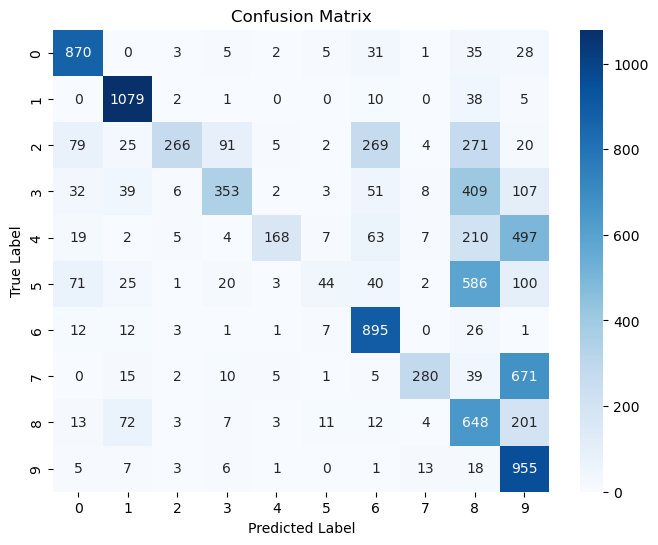

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Compute performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

#Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Correctly Classified Digits:


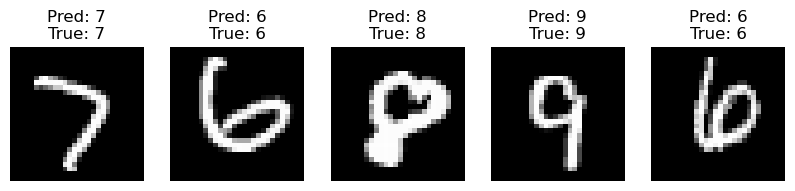

Incorrectly Classified Digits:


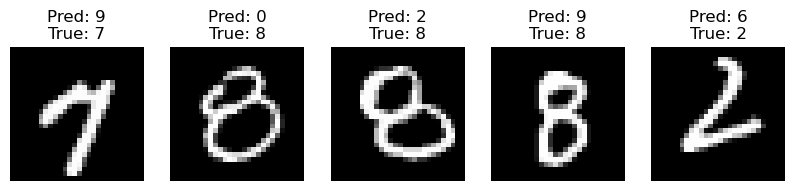

In [27]:
#Display correctly and incorrectly classified digits
def plot_classification_results(x_test, y_test, y_pred, correct=True, num_samples=5):
    indices = np.where(y_test == y_pred if correct else y_test != y_pred)[0]
    selected_indices = np.random.choice(indices, min(num_samples, len(indices)), replace=False)

    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(selected_indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
        plt.title(f"Pred: {y_pred[idx]}\nTrue: {y_test[idx]}")
        plt.axis("off")
    plt.show()

# Plot correctly classified samples
print("Correctly Classified Digits:")
plot_classification_results(x_test, y_test, y_pred, correct = True)
print("Incorrectly Classified Digits:")
plot_classification_results(x_test, y_test, y_pred, correct = False)

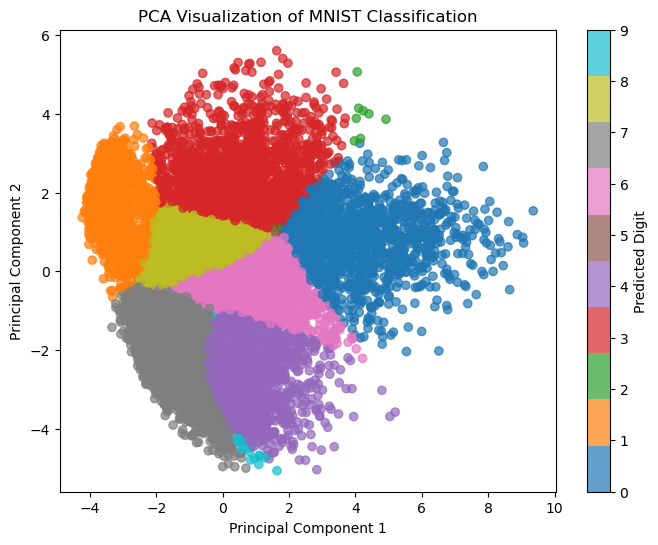

In [35]:
from sklearn.decomposition import PCA

#Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

#Trian Naive bayes on reduced features
gnb_pca = GaussianNB()
gnb_pca.fit(x_train_pca, y_train)

#Predict with PCA-reduced test data
y_pred_pca = gnb_pca.predict(x_test_pca)

#Scatter plot of PCA-transformed test data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_pred_pca, cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="Predicted Digit")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of MNIST Classification")
plt.show()